In [1]:
import tensorflow as tf
import pandas as pd 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import os

df_external = pd.read_csv(os.path.join(os.getcwd(),'External Validation Datasets/diverseNegatives External Validation Set.csv'))


In [2]:
###2.# Define the directory where your models are saved

parent_dir = os.path.dirname(os.getcwd())


model_directory = os.path.join(parent_dir, 'External Validation/Classification Models')

model_1_list = []
model_2_list = []
#,8,9,10,11,12,13,14,15,16,17,18,41
# Assuming your models are named 'model_0.h5', 'model_1.h5', ..., 'model_19.h5'
model1_paths = [os.path.join(model_directory, f'Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed {i+1}.keras') for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,41]]

model2_paths = [os.path.join(model_directory, f'Complete Set 2 Models/ROBOMechDB Complete Set 2 Model Seed {i+1}.keras') for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,41]]


for path in model1_paths:
    print(f'Loading model from {path}')
    model = tf.keras.models.load_model(path)
    model_1_list.append(model)
    print(f'Model from {path} loaded successfully')

for path in model2_paths:
    print(f'Loading model from {path}')
    model = tf.keras.models.load_model(path)
    model_2_list.append(model)
    print(f'Model from {path} loaded successfully')

Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-7-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 1.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-7-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 1.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-7-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 2.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-7-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 2.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-7-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 3.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Proj

In [3]:
model_1_prediction_matrix = []
model_2_prediction_matrix = []

for j in range(len(model_1_list)):
    model_1_prediction_value = model_1_list[j].predict(df_external.iloc[:,3:-1])
    model_1_prediction_value = model_1_prediction_value.flatten()
    model_1_prediction_matrix.append(model_1_prediction_value)
    
    model_2_prediction_value = model_2_list[j].predict(df_external.iloc[:,3:-1])
    model_2_prediction_value = model_2_prediction_value.flatten()
    model_2_prediction_matrix.append(model_2_prediction_value)
    
model_1_prediction_matrix = np.array(model_1_prediction_matrix)
model_2_prediction_matrix = np.array(model_2_prediction_matrix)

630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
630/630 ━━━

In [4]:
model_1_stability_matrix = model_1_prediction_matrix.T
model_2_stability_matrix = model_2_prediction_matrix.T

model_1_prediction_floats = np.array([np.mean(row) for row in model_1_stability_matrix])
model_2_prediction_floats = np.array([np.mean(row) for row in model_2_stability_matrix])
model_prediction_floats = 0.9*model_1_prediction_floats + 0.1*model_2_prediction_floats


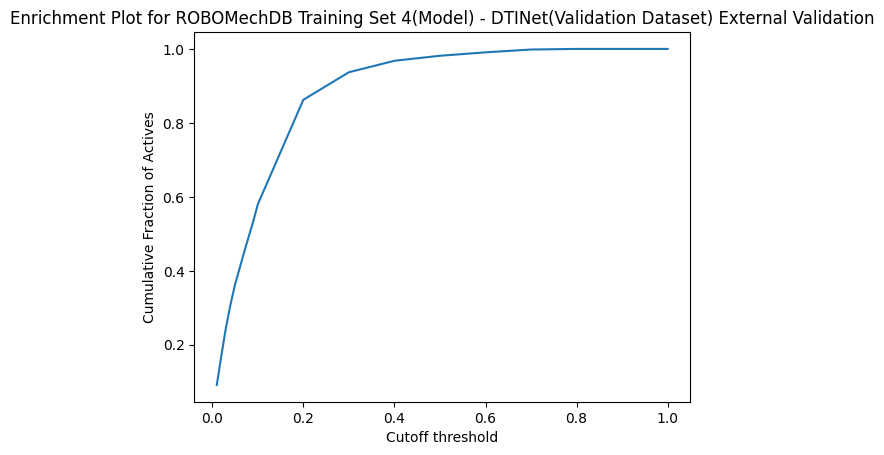

In [5]:
###6. Generate enrichment curve!

###README BELOW

#chi_cutoff_thresholds = the top % percent of model predictions evaluated
#N is equal to the total number of triples in the entire validation dataset, and Ns is equal to the total number of triples above the cutoff threshold. 
#ns is equal to the total number of true positives above the cutoff threshold, and n is equal to the total number of true positives across the whole dataset.

descending_confidence_values = np.sort(model_prediction_floats.flatten())[::-1]
ascending_indices = np.argsort(model_prediction_floats.flatten())
descending_indices = np.flip(ascending_indices)

chi_cutoff_thresholds = [0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

enrichment_percent_array = []
y_values = []

N = len(model_prediction_floats)

n=0
for z in range(len(df_external)):
    if df_external.iloc[z,-1] == 1:
        n=n+1
        
for i in chi_cutoff_thresholds: 
    ns = 0
    Ns = len(model_prediction_floats)*i
    for j in range(int(i*len(model_prediction_floats))):
        if df_external.iloc[descending_indices[j],-1]==1:
            ns = ns+1
            
    y_value = ns/n
    y_values.append(y_value)

plt.xlabel("Cutoff threshold")
plt.ylabel("Cumulative Fraction of Actives")
plt.title("Enrichment Plot for ROBOMechDB Training Set 4(Model) - DTINet(Validation Dataset) External Validation")

plt.plot(chi_cutoff_thresholds, y_values)

fpr,tpr, thresholds = roc_curve(df_external.iloc[:,-1],model_prediction_floats)

roc_auc = auc(fpr, tpr)


In [6]:
### 7. Generate statistics!

true_positive_count = 0
false_negative_count = 0
false_positive_count = 0
true_negative_count = 0



for i in range (0,len(model_prediction_floats)):
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 1:
        true_positive_count += 1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 1:
        false_negative_count +=1
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 0:
        false_positive_count +=1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 0:
        true_negative_count +=1

true_pos_rate = true_positive_count/(true_positive_count+false_negative_count)
true_neg_rate = true_negative_count/(false_positive_count+true_negative_count)

performance_array = np.array(y_values+[roc_auc,true_pos_rate,true_neg_rate]).reshape(1,22)
print(performance_array.shape)
column_names = ['0.01', '0.02', '0.03','0.04','0.05','0.06','0.07','0.08','0.09','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0','auroc','tpr','tnr']
stat_df = pd.DataFrame(performance_array, columns=column_names)


stat_df.to_csv(os.path.join(os.getcwd(), 'Validation Statistics/Model Performance on diverseNegatives External Set/set1set2_predicting_diverseNegs.csv'),index=False)

(1, 22)


In [ ]:
print(stat_df)